# part 1

In [1]:
import pandas as pd
import dask.bag as db
import json

In [ ]:
json_file_0 = "dblp-ref-0.json"
json_file_1 = "dblp-ref-1.json"
json_file_2 = "dblp-ref-2.json"
json_file_3 = "dblp-ref-3.json"

data_0 = pd.read_json(json_file_0, lines=True)
data_1 = pd.read_json(json_file_1, lines=True)
data_2 = pd.read_json(json_file_2, lines=True)
data_3 = pd.read_json(json_file_3, lines=True)
data = pd.concat([data_0, data_1, data_2, data_3], axis = 0)
data

In [ ]:
data_csv_0 = pd.read_csv("mappings_v10_ref_0.csv")
data_csv_1 = pd.read_csv("mappings_v10_ref_1.csv")
data_csv_2 = pd.read_csv("mappings_v10_ref_2.csv")
data_csv_3 = pd.read_csv("mappings_v10_ref_3.csv")
data_csv = pd.concat([data_csv_0, data_csv_1, data_csv_2, data_csv_3], axis = 0)
data_csv.columns = ['id', 'references']
data_csv

I'm using this option: treat papers as nodes and citation relationships as edges

I want to select the article that are widely used.
I choose treat papers as nodes, and citation relationships as edges. I select data for recent 6 years because it can show the network for recent researches. Also, select data posted in venue, I think the researches in venue will be more professional. Then, select n_citations >= 10, the more citation it has, the better article it is. 

Then, select number of reference > 10. A good article should has some reference. Also select number of reference below 20, to reduce computational cost.(I want to include references with more than 20, but my computer works very slow)

In [ ]:
year_cond = data['year'] >= 2021- 4
venue_cond = data['venue'].str.len() > 0
n_cite_cond = data['n_citation'] >= 20
reference_cond = data['references'].str.len()>= 20

In [ ]:
data[year_cond & venue_cond & n_cite_cond & reference_cond]

In [ ]:
# convert references from list to string, by mappings_v10_ref_3.csv
data_select = data[year_cond & venue_cond & n_cite_cond & reference_cond]
del data_select['references']

In [ ]:
final_data = pd.merge(data_select, data_csv, on="id")

In [ ]:
# saving for further edit

final_data.to_csv('data_part1.csv')
final_data

In [2]:
final_data = pd.read_csv('data_part1.csv')
# occurance of unique nodes

final_data.references.value_counts().value_counts()[0:30]

1     89600
2     14826
3      4415
4      1855
5       960
6       551
7       307
8       234
9       143
10      121
11       89
12       62
13       51
14       34
15       28
19       24
17       23
16       23
20       21
18       16
21        8
22        8
23        8
25        7
29        6
26        6
24        6
30        4
27        4
36        4
Name: references, dtype: int64

there is lots of nodes have occurance of 1 and 2. Delete them to have a better graph

In [3]:
cond = (final_data.references.value_counts()>5)
select_list = final_data.references.value_counts()[cond].index.tolist()
final_data = final_data.loc[final_data['references'].isin(select_list)]
final_data

,Unnamed: 0,abstract,authors,n_citation,title,venue,year,id,references
30,30,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,15b2f2e7-c4a6-4880-93d8-c47438f2e0c3
33,33,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,21b7e952-d559-4fb8-8e0e-f9ae7dda156e
35,35,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,2bcc2730-1b2e-4d43-ad5e-594081dcef4b
36,36,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,386266bc-f27f-40a1-b010-83184255af8d
37,37,"In this paper, we introduce a unified framewor...","['Chen Feng', 'Hong Xu', 'Baochun Li']",50,An Alternating Direction Method Approach to Cl...,IEEE Transactions on Parallel and Distributed ...,2017,38d7aa0a-1999-41f8-b7b0-6edc45e2314e,38e41a23-30d8-4c17-bf4c-b32bafc1ca0e
...,...,...,...,...,...,...,...,...,...
163901,163901,NaN,"['Alex Krizhevsky', 'Ilya Sutskever', 'Geoffre...",50,ImageNet classification with deep convolutiona...,Communications of The ACM,2017,73801861-fc10-4e0d-ab0d-4b3dfa4b6f9a,ca250ca4-70fd-411f-8cc7-fb17be31cd9e
163902,163902,NaN,"['Alex Krizhevsky', 'Ilya Sutskever', 'Geoffre...",50,ImageNet classification with deep convolutiona...,Communications of The ACM,2017,73801861-fc10-4e0d-ab0d-4b3dfa4b6f9a,f6bd8b64-684d-429a-aab5-8ff3a2c23cd6
163913,163913,NaN,"['Anfeng Liu', 'Xiao Liu', 'Zhipeng Tang', 'La...",50,Preserving Smart Sink-Location Privacy with De...,ACM Transactions in Embedded Computing Systems,2017,9f807a97-7ef4-445c-92b0-09b8cad15e55,422689de-2a78-463d-bf0d-8eb37d38c926
163927,163927,NaN,"['Anfeng Liu', 'Xiao Liu', 'Zhipeng Tang', 'La...",50,Preserving Smart Sink-Location Privacy with De...,ACM Transactions in Embedded Computing Systems,2017,9f807a97-7ef4-445c-92b0-09b8cad15e55,f0962494-a883-47f1-9dd7-8e15deb420d1


In [4]:
final_data.references.value_counts().value_counts()[0:30]

6     551
7     307
8     234
9     143
10    121
11     89
12     62
13     51
14     34
15     28
19     24
16     23
17     23
20     21
18     16
21      8
22      8
23      8
25      7
29      6
26      6
24      6
27      4
30      4
36      4
44      3
32      3
40      3
28      3
31      3
Name: references, dtype: int64

# Part 2

In [5]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(final_data, 'id', 'references')

In [6]:
# sort possible connected graphs

G_sort = sorted(nx.connected_components(G), key=len, reverse=True)

# biggest connected sub graph
G_subgraph = G.subgraph(G_sort[0])
print(nx.info(G_subgraph))

Name: 
Type: Graph
Number of nodes: 5391
Number of edges: 19318
Average degree:   7.1668


In [7]:
print(f"radius: {nx.radius(G_subgraph)}")
print(f"diameter: {nx.diameter(G_subgraph)}")
print(f"density: {nx.density(G_subgraph)}")

radius: 9
diameter: 16
density: 0.001329639965461573


In [8]:
import collections
import matplotlib.pyplot as plt

In [9]:
degree_sequence = sorted([d for n, d in G_subgraph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

[Text(0, 0, '180'),
 Text(0, 0, '126'),
 Text(0, 0, '115'),
 Text(0, 0, '93'),
 Text(0, 0, '90'),
 Text(0, 0, '81'),
 Text(0, 0, '77'),
 Text(0, 0, '75'),
 Text(0, 0, '74'),
 Text(0, 0, '73'),
 Text(0, 0, '71'),
 Text(0, 0, '68'),
 Text(0, 0, '64'),
 Text(0, 0, '63'),
 Text(0, 0, '62'),
 Text(0, 0, '61'),
 Text(0, 0, '59'),
 Text(0, 0, '58'),
 Text(0, 0, '55'),
 Text(0, 0, '54'),
 Text(0, 0, '51'),
 Text(0, 0, '49'),
 Text(0, 0, '47'),
 Text(0, 0, '45'),
 Text(0, 0, '44'),
 Text(0, 0, '43'),
 Text(0, 0, '42'),
 Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '38'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '35'),
 Text(0, 0, '34'),
 Text(0, 0, '33'),
 Text(0, 0, '32'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 

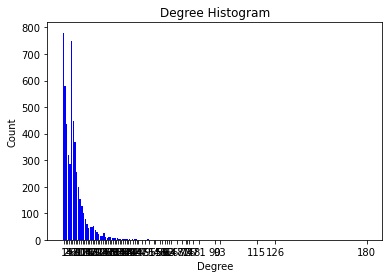

In [10]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 47, 49, 51, 54, 55, 58, 59, 61, 62, 63, 64, 68, 71, 73, 74, 75, 77, 81, 90, 93, 115, 126, 180)
(780, 580, 436, 321, 285, 749, 446, 368, 255, 198, 155, 129, 101, 78, 59, 44, 49, 48, 52, 38, 28, 22, 14, 16, 24, 9, 8, 10, 12, 5, 5, 5, 6, 4, 4, 4, 2, 3, 2, 4, 2, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


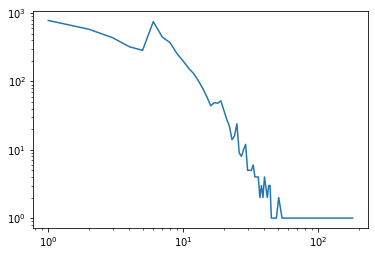

In [11]:
deg = deg[::-1]
cnt = cnt[::-1]
print(deg)
print(cnt)
plt.loglog(deg, cnt)

By the network statistics, my graph has number of nodes: 7250,
number of edges: 7984
Average degree:  2.2025, diameter 49 and density 0.003. 

(source data = id column, target data = reference column)
By the histogram, our dataset has the nodes with degree = 1 at most. Though I selected papers with 10-20 references as source data, but there is not many records for the target data. So, for most paper selected, the cited paper for our source data is only count once or twice. This happens because the sample size of my data is small, which cannot include all records for a certain paper in target data.This can explain why the density is low, since most nodes with degree 1. (D=|E| / |V|(|V|−1))

Since the histogram is sparsed, choose to draw the loglog graph, because it can show other degree's patten other than 1. 
log–log plot is a two-dimensional graph of numerical data that uses logarithmic scales on both the horizontal and vertical axes.
This graph helps show other point's degree. When x axis increases, there is a trend for y axis, number of count, decrease then increase about the point 10^1 on the log-log plot. 


Part 3

In [12]:
# Degree Centrality
# average

sum(list(nx.degree_centrality(G_subgraph).values()))/19348  # 19348  is number of nodes



0.0003704821714804409

This means the nodes are not central, it shows there is not many connections for each nodes.

In [13]:
# sort by degree

dict(sorted(nx.degree_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.03339517625231911,
 'b944f77f-113b-4a02-ae5e-d4a124b8fd5b': 0.023376623376623374,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.021335807050092765,
 'dd83785a-dd19-41e3-9b25-ebabbd48d336': 0.01725417439703154,
 'c1b6b493-01ef-420f-be44-7bacfe34e846': 0.016697588126159554,
 'bff1945c-7b01-4b42-b6c4-1e3601c18a6b': 0.015027829313543599,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.014285714285714285,
 '176a7436-78ea-4c2a-82e6-7930ab023bd1': 0.013914656771799629,
 'c93eac1a-7d9a-48ab-9fb4-389c85bea00e': 0.0137291280148423,
 '7f1214b2-e070-4ff2-a5d3-647e7c16c2d7': 0.013543599257884972,
 '051956bb-f64b-4fdb-87f8-3e2868b8b5d8': 0.013172541743970315,
 '65d5ccdc-7022-45b0-adf9-0385273b1283': 0.01261595547309833,
 '28d47fcd-4f94-4de9-b57b-99ba4545b867': 0.011873840445269016,
 '2b6a3d0f-368f-45bb-be23-4e82f62fbbf7': 0.011688311688311687,
 '7236dbb7-f0b2-4e28-bb7c-6de187c32d64': 0.01150278293135436,
 '35ba5778-6cd0-4b79-87ab-a524877af431': 0.01131725417439703,

In [14]:
# closeness centrality
# Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.
# find individual who works quickly

sum(list(nx.closeness_centrality(G_subgraph).values()))/19348  # 19348  is number of nodes

0.048003366620016856

In [15]:
# by sort the model, we can find which one works quick.

dict(sorted(nx.closeness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.24483306836248012,
 'b944f77f-113b-4a02-ae5e-d4a124b8fd5b': 0.24042107141264107,
 'dd83785a-dd19-41e3-9b25-ebabbd48d336': 0.23508374040474528,
 '35ba5778-6cd0-4b79-87ab-a524877af431': 0.23374821111062927,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.2291959008376919,
 'f56b877b-4060-4754-b303-e8140968544c': 0.22883586651948715,
 'c1b6b493-01ef-420f-be44-7bacfe34e846': 0.22843822843822845,
 '6b0707da-5e96-4b79-be18-4d8c6d3dba28': 0.22835112692763937,
 '5c183596-c620-4c77-995d-f47815e293fc': 0.22814814814814816,
 'e8eeb39c-a478-4087-9311-b0d7d85a5a1d': 0.22720566538802006,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.22681366773270492,
 'cccb4b4b-ce7f-4b1f-b68c-cab108f3cecf': 0.22673733804475854,
 '0fc4e3b7-89cf-41ee-90d2-430139caa2ca': 0.22648010420605907,
 'e537d143-155e-4ca0-8ae8-66b777a77fea': 0.2257969921662268,
 '3715c870-6569-4d20-8797-af8569e5fde5': 0.22576861858088296,
 '7236dbb7-f0b2-4e28-bb7c-6de187c32d64': 0.22508978535037166,
 'fece7fcb

These nodes works quick

In [16]:
# Betweeness cetrality
# betweeness is the degree the node lies on the shortest path between two other nodes

# we can find which node influence the system in the network.


sum(list(nx.betweenness_centrality(G_subgraph).values()))/19348 # 19348 is number of nodes

0.00025473339834560736

In [17]:
dict(sorted(nx.betweenness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.06243229920903483,
 'b944f77f-113b-4a02-ae5e-d4a124b8fd5b': 0.05453588968564226,
 'e537d143-155e-4ca0-8ae8-66b777a77fea': 0.046325862050602296,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.037195930509735686,
 '65d5ccdc-7022-45b0-adf9-0385273b1283': 0.03389345536224083,
 'f56b877b-4060-4754-b303-e8140968544c': 0.03062894743562508,
 'c1b6b493-01ef-420f-be44-7bacfe34e846': 0.029525402381006143,
 '6b0707da-5e96-4b79-be18-4d8c6d3dba28': 0.02901429716429285,
 'dd83785a-dd19-41e3-9b25-ebabbd48d336': 0.02786535221412196,
 '8026f56a-a93e-4933-8ead-c9aa9e3f0498': 0.02557288047523938,
 '5fafdd54-8868-4fc8-b0a8-083993fc222a': 0.024108656408658558,
 '35ba5778-6cd0-4b79-87ab-a524877af431': 0.022905129464164026,
 '7f1214b2-e070-4ff2-a5d3-647e7c16c2d7': 0.022784455366046695,
 'a53a3dda-b003-4d5c-96b1-e9afd8e35692': 0.019627757981349817,
 '3715c870-6569-4d20-8797-af8569e5fde5': 0.019175109222013105,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.017713598015338446,

These nodes influence the system a lot.

Question 4

In [18]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
from gae.preprocessing import mask_test_edges

In [19]:
np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(G_subgraph)

# Perform train-test split
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, \
    test_edges, test_edges_false = mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

In [20]:

# Inspect train/test split
print ("Total nodes:", adj_sparse.shape[0])
print ("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print ("Training edges (positive):", len(train_edges))
print ("Training edges (negative):", len(train_edges_false))
print ("Validation edges (positive):", len(val_edges))
print ("Validation edges (negative):", len(val_edges_false))
print ("Test edges (positive):", len(test_edges))
print ("Test edges (negative):", len(test_edges_false))

Total nodes: 5391
Total edges: 19318
Training edges (positive): 11592
Training edges (negative): 11592
Validation edges (positive): 1931
Validation edges (negative): 1931
Test edges (positive): 5795
Test edges (negative): 5795


In [21]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj_sparse[edge[0], edge[1]]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj_sparse[edge[0], edge[1]]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

# Adamic-Adar

In [22]:
nx.adamic_adar_index(g_train)

<generator object _apply_prediction.<locals>.<genexpr> at 0x000001DD44C651C8>

In [23]:
# Compute Adamic-Adar indexes from g_train
aa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.adamic_adar_index(g_train): # (u, v) = node indices, p = Adamic-Adar index
    aa_matrix[u][v] = p
    aa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
aa_matrix = aa_matrix / aa_matrix.max()

In [24]:

# Calculate ROC AUC and Average Precision
aa_roc, aa_ap = get_roc_score(test_edges, test_edges_false, aa_matrix)

print ('Adamic-Adar Test ROC score: ', str(aa_roc))
print ('Adamic-Adar Test AP score: ', str(aa_ap))

Adamic-Adar Test ROC score:  0.5031895485754657
Adamic-Adar Test AP score:  0.502430896082436


# Jaccard Coefficient

In [25]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

In [26]:
# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print ('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print ('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.503180659891713
Jaccard Coefficient Test AP score:  0.5008217422128499


# Preferential Attachment

In [27]:

# Calculate, store Adamic-Index scores in array
pa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.preferential_attachment(g_train): # (u, v) = node indices, p = Jaccard coefficient
    pa_matrix[u][v] = p
    pa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
pa_matrix = pa_matrix / pa_matrix.max()

In [28]:
# Calculate ROC AUC and Average Precision
pa_roc, pa_ap = get_roc_score(test_edges, test_edges_false, pa_matrix)

print ('Preferential Attachment Test ROC score: ', str(pa_roc))
print ('Preferential Attachment Test AP score: ', str(pa_ap))

Preferential Attachment Test ROC score:  0.7485305159531028
Preferential Attachment Test AP score:  0.7503449480711474
